# CNN PROJECT
## Importing libraries

In [13]:
import numpy as np
import tensorflow as tf
import keras
from keras import utils
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt

## Defining Training and Testing sets

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [25]:
x_train.shape

(60000, 28, 28, 1)

## Plotting the Dataset to get an idea of what it looks like

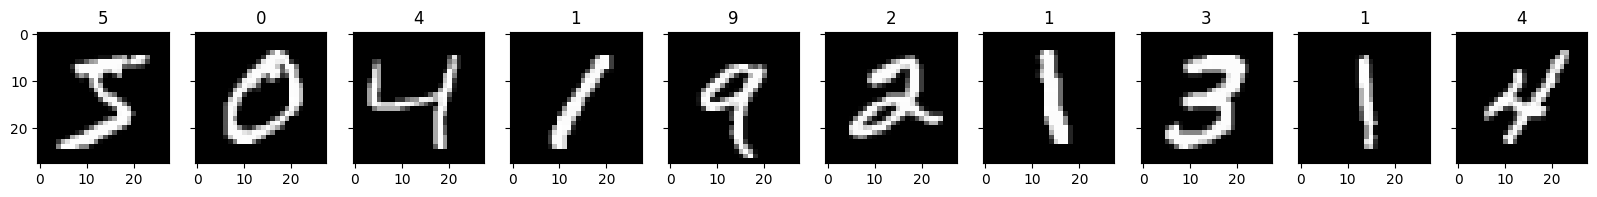

In [3]:
fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(True)
    axes[i].get_yaxis().set_visible(True)
plt.show()


## Reshaping the Dataset to include a channel dimension of (28,28,1) and Converting the labels to One Hot Encoding using *to_categorical* function

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


## Building the model and adding layers

In [5]:
# Build the CNN model
model = Sequential()

# 1st convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

# 2nd convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# 3rd convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))

# 4th convolutional layer
model.add(Conv2D(256, (3, 3), activation='relu'))

# Flatten the output
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Added dropout to reduce overfitting
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 1, 1, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           6,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 430,246 (1.64 MB)

 Trainable params: 430,246 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

## Compiling the Model

In [7]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


## Training the Model

In [8]:
# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 112s 58ms/step - accuracy: 0.8222 - loss: 0.5253 - val_accuracy: 0.9802 - val_loss: 0.0744
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 133s 53ms/step - accuracy: 0.9811 - loss: 0.0711 - val_accuracy: 0.9907 - val_loss: 0.0316
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 53ms/step - accuracy: 0.9857 - loss: 0.0547 - val_accuracy: 0.9885 - val_loss: 0.0409
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 98s 52ms/step - accuracy: 0.9908 - loss: 0.0386 - val_accuracy: 0.9918 - val_loss: 0.0307
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 146s 54ms/step - accuracy: 0.9927 - loss: 0.0280 - val_accuracy: 0.9896 - val_loss: 0.0407
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 138s 52ms/step - accuracy: 0.9929 - loss: 0.0290 - val_accuracy: 0.9914 - val_loss: 0.0393
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 98s 52ms/step - accuracy: 0.9941 - loss: 0.0242 - val_accuracy: 0.9900 - val_loss: 0.0489
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 152s 58ms/step - accuracy: 0.

## Evaluating the model by checking loss and accuracy of train and test sets

In [12]:
# Evaluating the model on the test set and get both loss and accuracy
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)

# Printing the training and test loss for comparison
print(f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")


Training Loss: 0.0085, Training Accuracy: 0.9980
Test Loss: 0.0420, Test Accuracy: 0.9925


## Plotting a graph to visualise the Train and Validation Loss

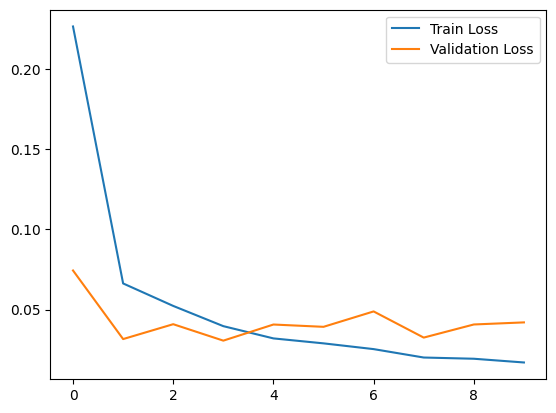

In [9]:
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()

## Plotting a graph to visualise the Train and Validation Accuracy

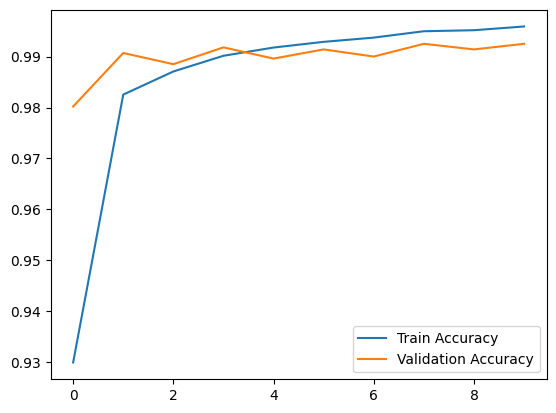

In [10]:
plt.plot(model.history.history['accuracy'],label='Train Accuracy')
plt.plot(model.history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()

## Saving the Model

In [15]:
model.save('mnist_cnn_model.h5')
model=keras.models.load_model('mnist_cnn_model.h5')

## Testing the model to see if it works

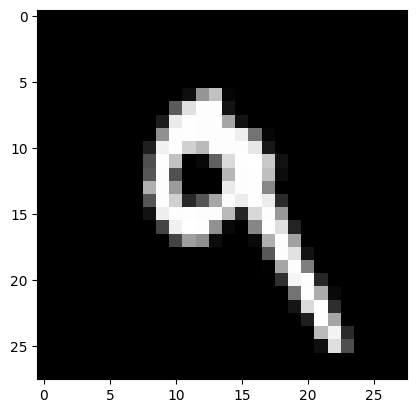

In [23]:
plt.imshow(x_test[7],cmap='gray')

In [24]:
x = np.reshape(x_test[7], (1, 28, 28, 1))
np.argmax(model.predict(x))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


9

Our model is predicting the number correctly!